# Year by year comparison

## Aims

Compare SSNAP data between each year (from 2016 to 2021), with the aim of understanding whether there might be any large differences related to the COVID-19 pandemic. Uses full dataset (i.e. just restricted by number of admissions - and not by whether arrived within 4 hours of known stroke onset).

## Caveats

Looking overall (not by stroke team) - variation between them in terms of impact.

## Set up

In [1]:
# Import packages and functions
from dataclasses import dataclass
import matplotlib.pyplot as plt
import os
import pandas as pd

# Linting
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
# Set paths and filenames
@dataclass(frozen=True)
class Paths:
    '''Singleton object for storing paths to data and files.'''

    data_path = './../output/'
    data_filename = 'reformatted_data.csv'
    admission_only_filename = 'reformatted_data_admissions_only.csv'
    hospitals_filename = 'clean_stroke_hospitals_2022.csv'

    notebook = '01'


paths = Paths()

In [3]:
# Load data
data_full = pd.read_csv(os.path.join(
    paths.data_path, paths.admission_only_filename))

## Set up

Create column with month+year or quarter+year.

In [4]:
# Create datetime with month and year
data_full['month_year_dt'] = pd.to_datetime(
    data_full['year'].astype(str) + '-' +
    data_full['month'].astype(str), format='%Y-%m')

# Convert to period of m (month and year)
data_full['month_year'] = data_full['month_year_dt'].dt.to_period('m')

# Convert to period of q (quarter and year)
data_full['quarter_year'] = data_full['month_year_dt'].dt.to_period('q')

## Functions

In [5]:
def plot_line(time, outcome, type, ax, title, legend):
    '''
    Create line plot
    time = string, column with time variable
    outcome = string, column with outcome variable
    type = string, type of operation (e.g. size, mean)
    ax = axis object to plot on
    title = string, figure title
    legend = True or False (depending on whether want to show legend)
    '''
    # Groupby timeperiod and period operation (e.g. count, proportion)
    if type == 'size':
        df = data_full.groupby(time).size().reset_index(name=outcome)
    elif type == 'mean':
        df = data_full.groupby(time)[outcome].mean().reset_index()
    elif type == 'median':
        df = data_full.groupby(time)[outcome].median().reset_index()

    # Create line plot
    df.plot.line(x=time, y=outcome, title=title, marker='o',
                 markersize=2.5, legend=None, ax=ax)

    # Add vertical line indicating start of lockdown
    if time == 'month_year':
        first = pd.Timestamp('2020-03-01').to_period('m')
        second = pd.Timestamp('2020-11-01').to_period('m')
        third = pd.Timestamp('2021-01-01').to_period('m')
    elif time == 'quarter_year':
        first = pd.Timestamp('2020-03-01').to_period('q')
        second = pd.Timestamp('2020-11-01').to_period('q')
        third = pd.Timestamp('2021-01-01').to_period('q')
    elif time == 'year':
        first = 2020
        second = 2020
        third = 2021

    ax.axvline(x=first, color='red', linestyle='--', alpha=0.3,
               label='first lockdown')
    ax.axvline(x=second, color='green', linestyle='--', alpha=0.3,
               label='second lockdown')
    ax.axvline(x=third, color='purple', linestyle='--', alpha=0.3,
               label='third lockdown')
    if legend:
        ax.legend(prop={'size': 6})


def create_line_plots(outcome, type, title_start):
    '''
    Create series of line plots (per month, per quarter and per year)
    outcome = string, column with outcome variable
    type = string, type of operation (e.g. size, mean)
    title_start = string, start of title (to then end with 'per month' etc)
    '''
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
    plot_line('month_year', outcome, type, ax[0],
              title_start + ' per month', legend=True)
    plot_line('quarter_year', outcome, type, ax[1],
              title_start + ' per quarter', legend=False)
    plot_line('year', outcome, type, ax[2],
              title_start + ' per year', legend=False)
    plt.show()

## Admissions

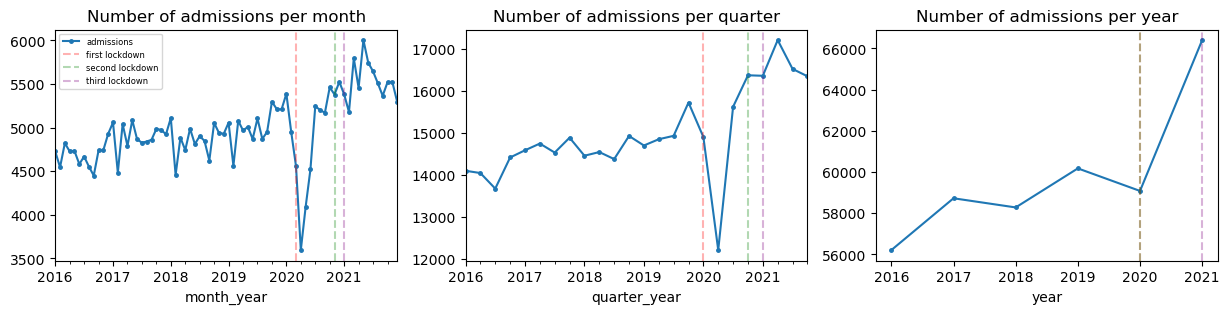

In [6]:
create_line_plots('admissions', 'size', 'Number of admissions')

## Thrombolysis

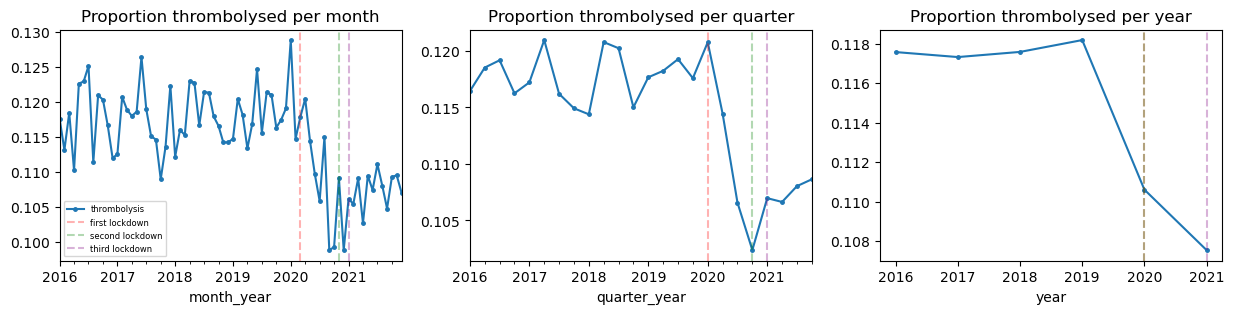

In [7]:
create_line_plots('thrombolysis', 'mean', 'Proportion thrombolysed')

## Time to arrival and treatment

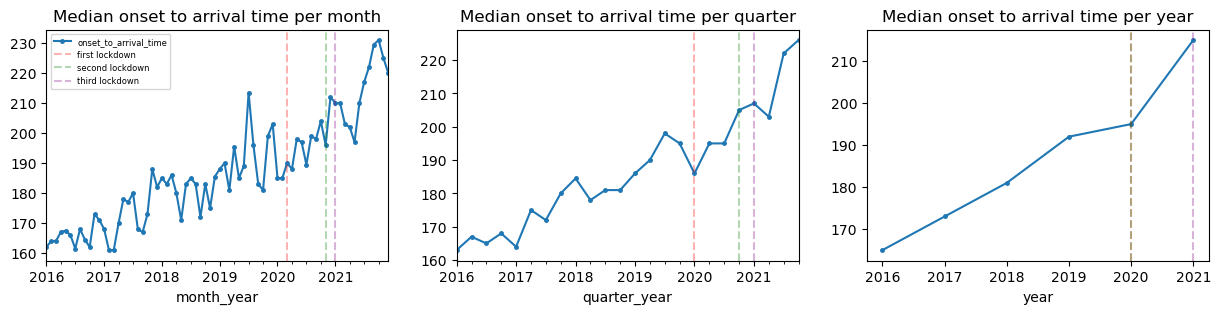

In [8]:
create_line_plots('onset_to_arrival_time', 'median',
                  'Median onset to arrival time')

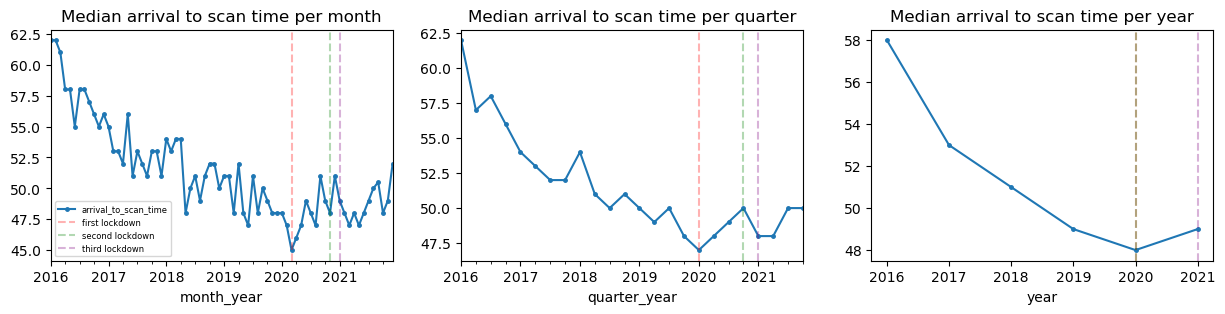

In [9]:
create_line_plots('arrival_to_scan_time', 'median',
                  'Median arrival to scan time')

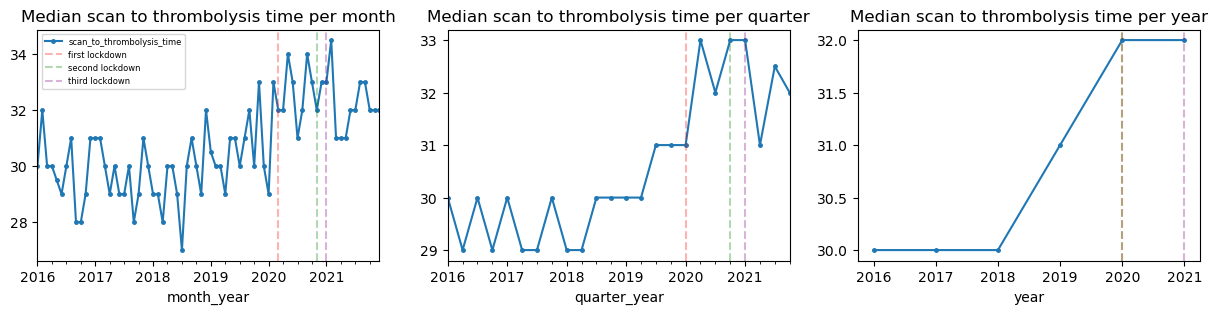

In [10]:
create_line_plots('scan_to_thrombolysis_time', 'median',
                  'Median scan to thrombolysis time')

## Known onset

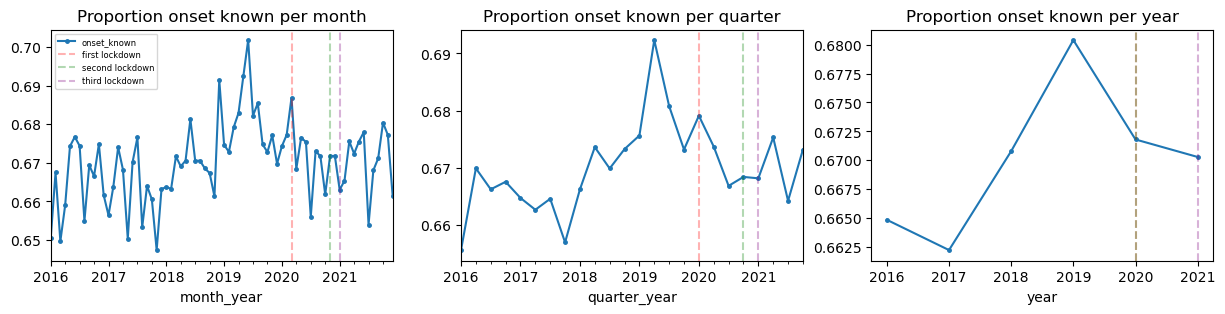

In [11]:
create_line_plots('onset_known', 'mean', 'Proportion onset known')